# ArUco markers generation and identification
Aruco Finder is part of the <B>follow me drone</B> project, it provides tracking capabilities using ArUco markers.
In this notebook i will go through the necessary steps to generate and identify a set of ArUco markers.
### What's an Aruco Marker ?
An aruco marker is a type of fiducial marker that allows to track objects and their orientation.
### How do we start ?
The first step is generating ArUco markers.
First of all we need to prepare our environment installing and importing mandatory modules, i listed them in the requirements.txt file

In [11]:
#!git clone https://github.com/Nunzio03/follow-me-drone-notebooks
%cd follow-me-drone-notebooks/
!pip3 install -r requirements.txt


[Errno 2] No such file or directory: 'follow-me-drone-notebooks/'
/content/follow-me-drone-notebooks


In [0]:


import numpy as np
import cv2
from cv2 import aruco
import matplotlib.pyplot as plt
import matplotlib as mpl


Then we can load our dictionary: it is important to notice that by using a smaller dictionary you can generate less markers, but your markers will be easier to recognize than those generated by a larger dictionary.

In [0]:
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)


Now we can generate, save and show our markers.

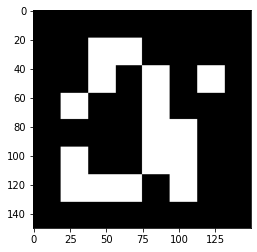

In [14]:
fig = plt.figure()
identifier = 42
dimension = 150
marker = aruco.drawMarker(aruco_dict,identifier, dimension)
plt.imshow(marker, cmap = mpl.cm.gray)


plt.savefig("./markers/marker42.pdf")

plt.show()

Now we can take a photo and try to identify it

### Identification
Identification will be performed using opencv 

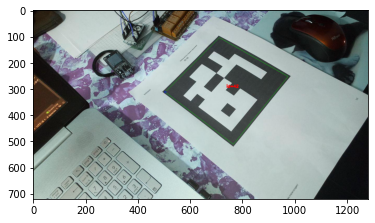

In [15]:
frame = cv2.imread("./markers/42.jpg") #reading image containing an aruco marker generated by a dict of 7X7
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) #turning it black and white 
# defining the detector
aruco_dict = aruco.Dictionary_get(aruco.DICT_7X7_1000) #PAY ATTENTION on which dictionary you are using
parameters = aruco.DetectorParameters_create()
# detection
corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)
#plotting
plt.imshow(frame_markers, cmap = mpl.cm.gray)
plt.show()


Notice that this operation can be made also using a video source, such as the laptop camera, in this case the code will be:

In [0]:
if False: #this line is here just to avoid code execution by jupyter notebook
    video_capture = cv2.VideoCapture(0)
    while True:
        ret, frame = video_capture.read()

        cv2.imshow("video", frame)

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        aruco_dict = aruco.Dictionary_get(aruco.DICT_7X7_1000)
        parameters = aruco.DetectorParameters_create()
        corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
        frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)
        width = 2400
        dim = (width, int(width*3/4))
        frame_markers = cv2.resize(frame_markers, dim, interpolation=cv2.INTER_AREA)

        cv2.imshow("markers", frame_markers)

        if cv2.waitKey(1) & 0xFF == ord('q'):  # quit from script
            break


Unluckly this operation cannot be executed here on the jupyter book, so it was tested on my laptop.
here's the results:

In [17]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/JR8oGSi-Mas" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>